In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import math

In [2]:
suv_data = pd.read_csv('Desktop/Social_Network_Ads.csv')
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
print("# number of people in original data:" +str(len(suv_data.index)))

# number of people in original data:400


# Analyzing Data

<Axes: xlabel='EstimatedSalary', ylabel='count'>

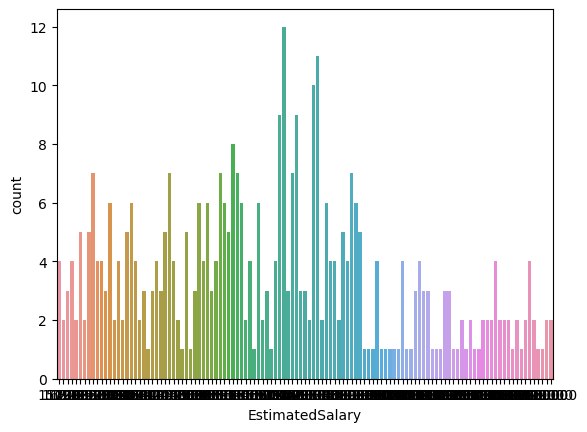

In [5]:
sns.countplot(x="EstimatedSalary", data = suv_data)

<Axes: xlabel='EstimatedSalary', ylabel='count'>

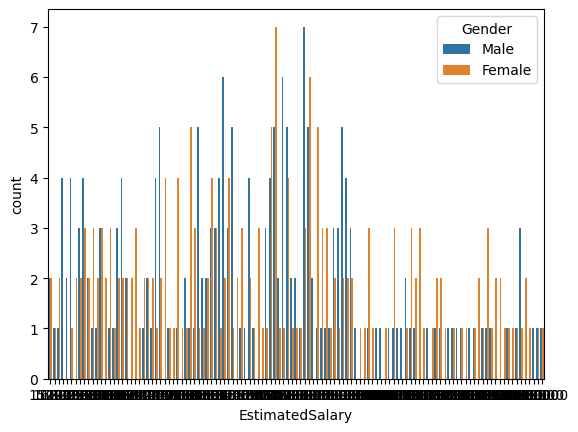

In [7]:
sns.countplot(x="EstimatedSalary",hue="Gender", data=suv_data)

<Axes: xlabel='EstimatedSalary', ylabel='count'>

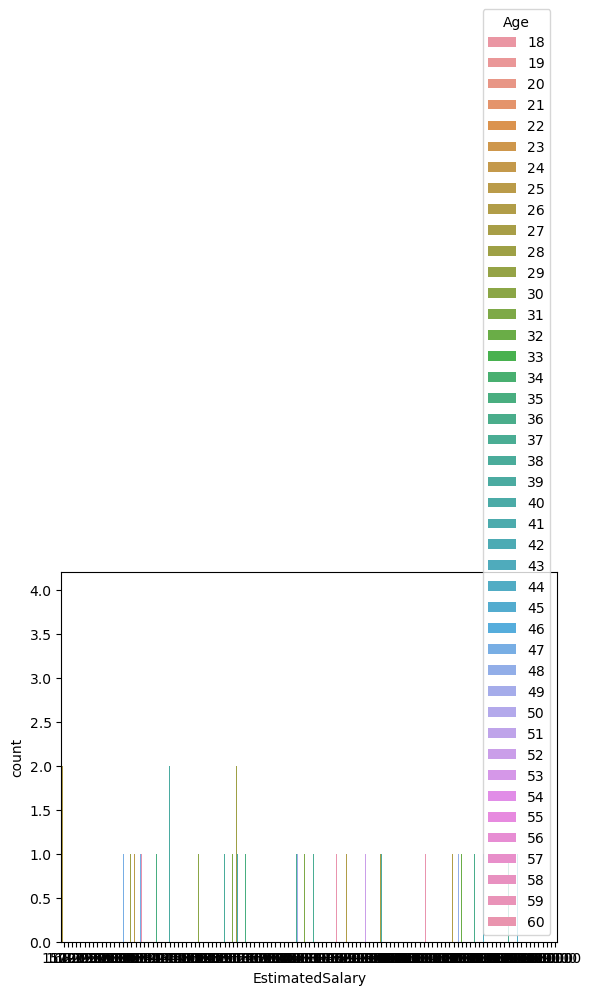

In [8]:
sns.countplot(x="EstimatedSalary",hue="Age", data=suv_data)

<Axes: ylabel='Frequency'>

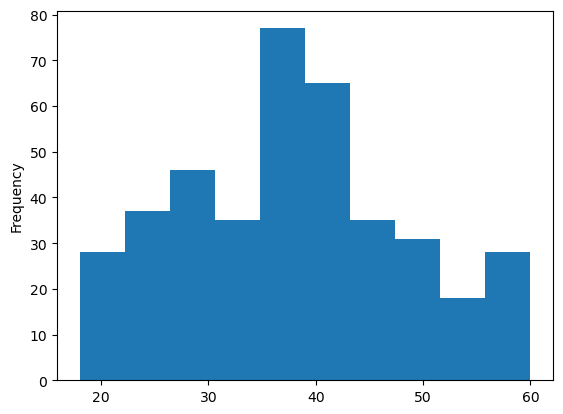

In [9]:
suv_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

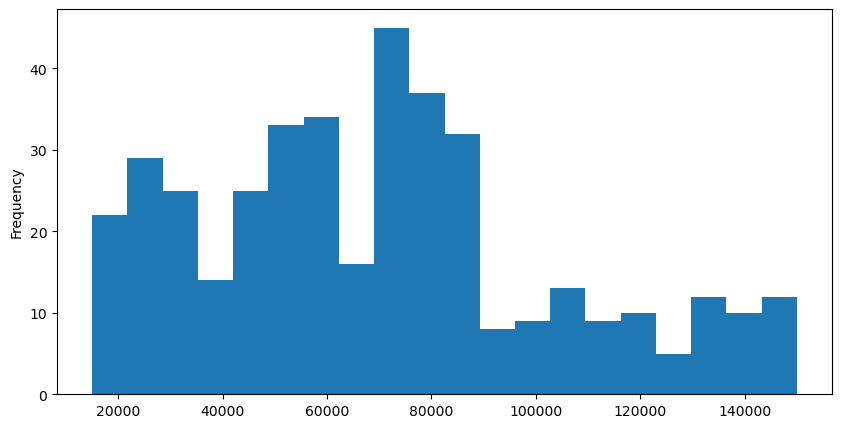

In [11]:
suv_data["EstimatedSalary"].plot.hist(bins=20,figsize=(10,5))

## Data Wrangling

In [12]:
suv_data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [13]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
suv_data.drop("User ID", axis=1, inplace=True)

In [15]:
suv_data.head(20)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [16]:
sex=pd.get_dummies(suv_data['Gender'],drop_first=True).astype(int)
sex.head(20)

,Male
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [17]:
suv_data.drop("Gender", axis=1, inplace=True)
suv_data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [18]:
suv_data = pd.concat([suv_data,sex], axis=1)
suv_data.head(10)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
5,27,58000,0,1
6,27,84000,0,0
7,32,150000,1,0
8,25,33000,0,1
9,35,65000,0,0


### Training Data

In [21]:
X = suv_data.iloc[:,[0,1]].values
y=suv_data.iloc[:,2].values

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [24]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()

In [28]:
from sklearn.linear_model import LogisticRegression

In [46]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [47]:
y_pred=classifier.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,y_pred) * 100

68.0